<h1>This notebook is an exploration of the structure of the forcing files used for MOHID<h1>
    <ol>
        <li>
            <a href="#winds">Winds</a>
        </li>
        <li>
            <a href="#currents">Currents</a>
        </li>
        <li>
            <a href="#createwind">Create Wind Input file Structure</a>
        </li>
        <li>
            <a href="#createcurrents">Create Current Input file Structure</a>
        </li>
        <li>
            <a href="#compare">Compare Stuctures</a>
        </li>
    </ol>

In [1]:
import numpy as np
from tables import * 
import xarray as xr
import datetime as datetime
from salishsea_tools import viz_tools
import matplotlib.pyplot as plt
import time

<div id='winds'><a name='Winds'></a><h2>Winds</h2></div>

In [38]:
h5wind = open_file('/ocean/abhudia/MEOPAR/analysis-ashutosh/temp/st_georgia_wind.hdf5')
for group in h5wind.walk_groups():
    print(group)

/ (RootGroup) ''
/Results (Group) ''
/Time (Group) ''
/Results/wind velocity X (Group) ''
/Results/wind velocity Y (Group) ''


<div id='currents'><a name='Currents'></a><h2>Currents</h2></div>

In [14]:
h5current = open_file('/ocean/abhudia/MEOPAR/analysis-ashutosh/temp/St_georgia.hdf5')
for group in h5current.walk_groups():
    print(group)

/ (RootGroup) ''
/Results (Group) ''
/Time (Group) ''
/Results/velocity U (Group) ''
/Results/velocity V (Group) ''
/Results/water level (Group) ''


In [36]:
for time in getattr(h5current.root.Time, 'Time_00168'):
    print(time)

2015.0
4.0
14.0
22.0
30.0
0.0


In [4]:
a = np.asarray(getattr(getattr(h5current.root.Results, 'velocity U'), 'velocity U_00001'))

In [18]:
getattr(getattr(h5current.root.Results, 'velocity U'), 'velocity U_00001')

/Results/velocity U/velocity U_00001 (CArray(40, 396, 896), zlib(6)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (40, 396, 896)

In [7]:
a[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<div id='createwind'><a name='Currents'></a><h2>Create wind input file structure</h2></div>

In [48]:
# time is stroed in array ([year, month, day, hour, minutes, seconds])

getattr(h5current.root.Results, 'velocity U')

/Results/velocity U (Group) ''
  children := ['velocity U_00001' (CArray), 'velocity U_00002' (CArray), 'velocity U_00003' (CArray), 'velocity U_00004' (CArray), 'velocity U_00005' (CArray), 'velocity U_00006' (CArray), 'velocity U_00007' (CArray), 'velocity U_00008' (CArray), 'velocity U_00009' (CArray), 'velocity U_00010' (CArray), 'velocity U_00011' (CArray), 'velocity U_00012' (CArray), 'velocity U_00013' (CArray), 'velocity U_00014' (CArray), 'velocity U_00015' (CArray), 'velocity U_00016' (CArray), 'velocity U_00017' (CArray), 'velocity U_00018' (CArray), 'velocity U_00019' (CArray), 'velocity U_00020' (CArray), 'velocity U_00021' (CArray), 'velocity U_00022' (CArray), 'velocity U_00023' (CArray), 'velocity U_00024' (CArray), 'velocity U_00025' (CArray), 'velocity U_00026' (CArray), 'velocity U_00027' (CArray), 'velocity U_00028' (CArray), 'velocity U_00029' (CArray), 'velocity U_00030' (CArray), 'velocity U_00031' (CArray), 'velocity U_00032' (CArray), 'velocity U_00033' (CArray

In [19]:
#getattr(getattr(h5wind.root.Results, 'wind velocity X'), 'wind velocity X_00001'
getattr(getattr(h5current.root.Results, 'water level'), 'water level_00001')

/Results/water level/water level_00001 (CArray(396, 896), zlib(6)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (396, 896)

In [6]:
class Wind_X(IsDescription):
    array = Float64Atom(shape=(), dflt=0.0)

In [7]:
class Wind_Y(IsDescription):
    array = Float64Atom(shape=(), dflt=0.0)

In [8]:
class Times(IsDescription):
    array = Float64Atom(shape=(), dflt=0.0)

In [9]:
# create hdf5 file
h5file = open_file("temp/winds.h5", mode="w", title="Winds Test file")

In [10]:
times = h5file.create_group("/", 'Time', 'Time')
results = h5file.create_group("/", 'Results', 'Results')
wind_u = h5file.create_group(results, 'wind velocity X', 'wind velocity X')
wind_v = h5file.create_group(results, 'wind velocity Y', 'wind velocity Y')

/home/abhudia/anaconda3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'wind velocity X'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/abhudia/anaconda3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'wind velocity Y'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [12]:
wind_arr = xr.open_dataset('/results2/MIDOSS/forcing/SalishSeaCast/hrdps/28nov17-05dec17/GEM.nc')

In [13]:
u_arr = wind_arr.u_wind.values

In [14]:
v_arr = wind_arr.v_wind.values

In [15]:
u_arr.shape

(192, 266, 256)

In [ ]:
# write u wind values ot array
for i in range(u_arr.shape[0]):
    h5file.create_carray(wind_u, f'{i}',obj = u_arr[i],shape=(266, 256), chunkshape = (266, 256))

In [17]:
# write u wind values ot array
for i in range(v_arr.shape[0]):
    h5file.create_carray(wind_v, f'{i}',obj = v_arr[i],shape=(266, 256), chunkshape = (266, 256))

In [18]:
for group in h5file.walk_groups():
    print(group)

/ (RootGroup) 'Winds Test file'
/Results (Group) 'Results'
/Time (Group) 'Time'
/Results/wind velocity X (Group) 'wind velocity X'
/Results/wind velocity Y (Group) 'wind velocity Y'


In [29]:
# confirm
np.asarray(getattr(getattr(h5file.root.Results, 'wind velocity X'), '0'))

(266, 256)

<div id='createcurrents'><a name='Currents'></a><h2>Create currents input file structure</h2></div>

In [2]:
strt = time.time()

In [3]:
# make hdf5 fle for currents
h5file = open_file("temp/currents.hdf5", mode="w", title="Currents Test file")

# make tree structure
times = h5file.create_group("/", 'Time', '')
results = h5file.create_group("/", 'Results', '')
velocity_u = h5file.create_group(results, 'velocity U', '')
velocity_v = h5file.create_group(results, 'velocity V', '')
water_level = h5file.create_group(results, 'water level', '')

/home/abhudia/anaconda3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'velocity U'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/abhudia/anaconda3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'velocity V'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/abhudia/anaconda3/lib/python3.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'water level'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still wo

In [ ]:
# write in chunks of size 12
sliceend = 35
slicebegin = 23
num_disp = 0
count = 0
while sliceend <= 191:
    U = xr.open_dataset('/results2/MIDOSS/forcing/SalishSeaCast/nowcast-green/07apr15-14apr15/U.nc').isel(time_counter = slice(slicebegin,sliceend))
    V = xr.open_dataset('/results2/MIDOSS/forcing/SalishSeaCast/nowcast-green/07apr15-14apr15/V.nc').isel(time_counter = slice(slicebegin,sliceend))
    T = xr.open_dataset('/results2/MIDOSS/forcing/SalishSeaCast/nowcast-green/07apr15-14apr15/T.nc').isel(time_counter = slice(slicebegin,sliceend))
    datelist = U.time_counter.values.astype('datetime64[s]').astype(datetime.datetime)
    # unstagger
    unstaggered_U  = viz_tools.unstagger_xarray(U.vozocrtx, 'x').values[...,:,1:897:,1:397]
    unstaggered_V  = viz_tools.unstagger_xarray(V.vomecrty, 'y').values[...,:,1:897:,1:397]
    unstaggered_T = T.sossheig.values[...,:,1:897:,1:397]
    # rotate
    current_u, current_v = viz_tools.rotate_vel(unstaggered_U, unstaggered_V)
    # clear memory
    unstaggered_U, unstaggered_V = 0,0
    # transpose grid
    current_u = np.transpose(current_u, [0,1,3,2])
    current_v = np.transpose(current_v, [0,1,3,2])
    unstaggered_T = np.transpose(unstaggered_T, [0,2,1])
    # flip by depth dimension
    current_u = np.flip(np.nan_to_num(current_u).astype('float64'), axis = 1)
    current_v = np.flip(np.nan_to_num(current_v).astype('float64'), axis = 1)
    
    unstaggered_T = np.nan_to_num(unstaggered_T).astype('float64')
    # make list of time arrays
    datearrays = []
    for date in datelist:
        datearrays.append(np.array([date.year, date.month, date.day, date.hour, date.minute, date.second]).astype('float64'))
    # write u wind values to hdf5
    for i in range(current_u.shape[0]):
        velocity_attr = 'velocity U_' + ((5 - len(str(i + 1 + num_disp))) * '0') + str(i + 1 + num_disp)
        h5file.create_carray(velocity_u, f'{velocity_attr}',obj = current_u[i],shape=(40, 396, 896), chunkshape = (40, 396, 896))

    # write v wind values to hdf5
    for i in range(current_v.shape[0]):
        velocity_attr = 'velocity V_' + ((5 - len(str(i + 1 + num_disp))) * '0') + str(i + 1 + num_disp)
        h5file.create_carray(velocity_v, f'{velocity_attr}',obj = current_v[i],shape=(40, 396, 896), chunkshape = (40, 396, 896))

    # write  water level values to hdf5
    for i in range(unstaggered_T.shape[0]):
        level_attr = 'water level_' + ((5 - len(str(i + 1 + num_disp))) * '0') + str(i + 1 + num_disp)
        h5file.create_carray(water_level, f'{level_attr}',obj = unstaggered_T[i],shape=(396, 896), chunkshape = (396, 896))
    
    # write time values to hdf5
    for i in range(len(datearrays)):
        time_attr = 'Time_' + ((5 - len(str(i + 1 + num_disp))) * '0') + str(i + 1 + num_disp)
        h5file.create_carray(times, f'{time_attr}',obj = datearrays[i],shape=(6,), chunkshape = (6,))
    num_disp = num_disp + current_u.shape[0]
    slicebegin = sliceend
    sliceend = sliceend + 12
    count = count + 1
    print(count)

In [5]:
h5file.close()

In [6]:
print(time.time() - strt)

525.8948543071747


<div id='compare'><a name='Compare'></a><h2>Compare</h2></div>

In [7]:
shihan = open_file('/ocean/abhudia/MEOPAR/analysis-ashutosh/temp/St_georgia.hdf5')
for group in shihan.walk_groups():
    print(group)

/ (RootGroup) ''
/Results (Group) ''
/Time (Group) ''
/Results/velocity U (Group) ''
/Results/velocity V (Group) ''
/Results/water level (Group) ''


In [8]:
ashu = open_file('temp/currents.hdf5')
for group in ashu.walk_groups():
    print(group)

/ (RootGroup) 'Currents Test file'
/Results (Group) ''
/Time (Group) ''
/Results/velocity U (Group) ''
/Results/velocity V (Group) ''
/Results/water level (Group) ''


In [9]:
shihan.root.Results

/Results (Group) ''
  children := ['velocity U' (Group), 'velocity V' (Group), 'water level' (Group)]

In [10]:
ashu.root.Results

/Results (Group) ''
  children := ['velocity U' (Group), 'velocity V' (Group), 'water level' (Group)]

In [11]:
s = np.asarray(getattr(getattr(shihan.root.Results, 'velocity U'), 'velocity U_00001'))

In [12]:
a = np.asarray(getattr(getattr(ashu.root.Results, 'velocity U'), 'velocity U_00001'))

In [13]:
np.asarray(getattr(shihan.root.Time, 'Time_00001'))

array([2015.,    4.,    7.,   23.,   30.,    0.])

In [14]:
np.asarray(getattr(ashu.root.Time, 'Time_00001'))

array([2015.,    4.,    7.,   23.,   30.,    0.])

In [25]:
getattr(shihan.root.Time, 'Time_00001').attrs

/Time/Time_00001._v_attrs (AttributeSet), 3 attributes:
   [Maximum := array([2016.]),
    Minimum := array([-0.]),
    Units := b'YYYY/MM/DD HH:MM:SS']

In [24]:
getattr(ashu.root.Time, 'Time_00001').attrs

/Time/Time_00001._v_attrs (AttributeSet), 3 attributes:
   [CLASS := 'CARRAY',
    TITLE := '',
    VERSION := '1.1']

In [15]:
np.max(s[1])

0.1288851648569107

In [16]:
np.max(a[1])

0.12186338007450104

In [18]:
index = -1

/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


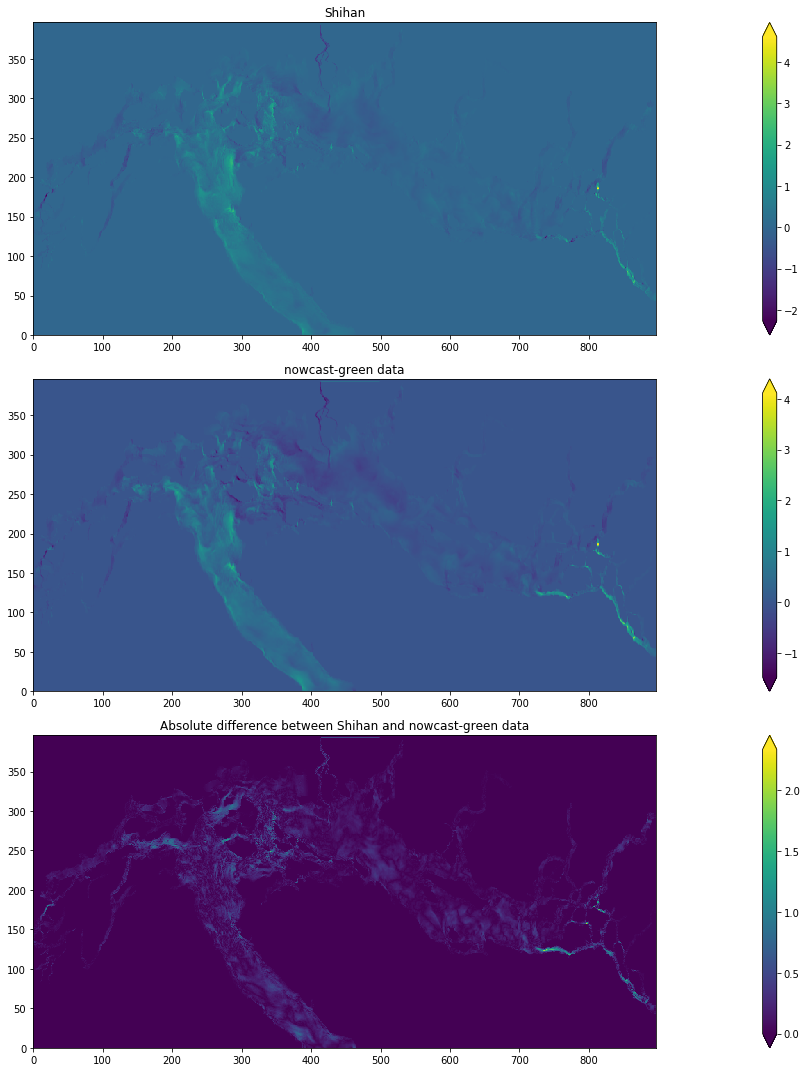

In [19]:
fig = plt.figure(figsize = (30,15))
ax = plt.subplot(3,1,1)
plt.pcolormesh(s[index])
plt.colorbar(extend = 'both')
plt.title('Shihan')
viz_tools.set_aspect(ax)
ax = plt.subplot(3,1,2)
plt.pcolormesh(a[index])
plt.colorbar(extend = 'both')
plt.title('nowcast-green data')
viz_tools.set_aspect(ax)
ax = plt.subplot(3,1,3)
plt.pcolormesh(np.abs(s[index]-a[index]))
plt.colorbar(extend = 'both')
plt.title('Absolute difference between Shihan and nowcast-green data')
viz_tools.set_aspect(ax)
plt.tight_layout()

# My grids have the same or fewer empty rows and columns than Shihan's at each depth value

In [20]:
# number of empty rows in shihan's grid
number = []
for index in range(40):
    rows = 0
    for i in range(396):
        if np.sum(s[index][i]) == 0:
            rows = rows+ 1
    number.append(rows)
print(number)

[396, 223, 218, 206, 193, 180, 141, 99, 72, 30, 20, 17, 16, 14, 14, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 8, 5, 3, 3, 3, 3, 3, 3, 3]


In [21]:
# number of empty rows in ashu's grid
number = []
for index in range(40):
    rows = 0
    for i in range(396):
        if np.sum(a[index][i]) == 0:
            rows = rows+ 1
    number.append(rows)
print(number)

[396, 221, 215, 204, 191, 176, 134, 92, 66, 26, 18, 16, 15, 13, 13, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 6, 3, 2, 2, 2, 2, 2, 2, 2]


In [22]:
# number of empty cols in shihan's grid
number = []
for index in range(40):
    rows = 0
    for i in range(396):
        if np.sum(s[index].T[i]) == 0:
            rows = rows+ 1
    number.append(rows)
print(number)

[396, 396, 396, 396, 392, 386, 373, 315, 243, 173, 123, 71, 35, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# number of empty cols in ashu's grid
number = []
for index in range(40):
    rows = 0
    for i in range(396):
        if np.sum(a[index].T[i]) == 0:
            rows = rows+ 1
    number.append(rows)
print(number)

[396, 396, 396, 396, 391, 380, 365, 302, 234, 165, 111, 64, 31, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
cu